<a href="https://colab.research.google.com/github/JuanMZ96/DataScience/blob/main/SegundaEntregaFinal_Juan_Martinez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Entrega 13/06

# Análisis de datos sobre GamerClub

### Introducción

GamerClub es una plataforma que te permite jugar al counter strike global offensive por fuera del sistema oficial que tiene el juego. Tiene su propio ranking para nivelar a los jugadores, sus modos de juegos y sus propios torneos. Es una plataforma muy completa que te permite disfrutar de otra manera del juego.


 Con todas estas premisas se genera mucha información acerca del juego y de los jugadadores. Como pueden ser las estadisticas de cada partida, como mapa, cantidad kills, muertes, hs, entre otras variales que se pueden analizar. En cuanto a los jugadores se puede ver la cantidad total de lo mismos, como saber de que país es cada uno, como también saber la cantidad de jugadores pagan la suscripción.

En esta entrega vamos intentar respondes las preguntas mas frecuentes como:
- ¿ Cuál es el mapa favorito?
- ¿Cuál es la cantidad de jugadores? ¿De qué países son?
- ¿Cuáles son las edades de los jugadores?
- ¿Cuántas partidas se juegan en un año?
- ¿Cuál es su país? ¿Que medallas tiene?, etc

Esta información que se va generar les va a servir a la nueva gente que quiera jugar porque va a saber con quienes va a jugar, tanto por edad, como país. También saber los mapas para poder prácticarlos, la fecha es que puede jugar más y los niveles en los que va a conseguir partidas.
Si bien esta información no está completa te da una idea para prepararte.

## Obtención de los dataSet

Para eso vamos a instalar kaggle que nos permite usar la api para poder consultar los dataset de manera mas afectiva.

In [ ]:
!pip install -q kaggle

Creamos un directorio en el cual vamos a descargar el archivo json

In [ ]:
mkdir ~/.kaggle

Vamos a utilizar la libreria urllib.request se utiliza para descargar el archivo. La función acepta dos argumentos: la URL del archivo que se desea descargar y la ruta donde se almacenará el archivo descargado.

In [ ]:
import urllib.request

url = ' https://drive.google.com/uc?export=download&id=1tfIEqG43pPeXGS0dS6jKwxRj9JrAddX1'
ruta_archivo = '/root/.kaggle/kaggle.json'

urllib.request.urlretrieve(url, ruta_archivo)

('/root/.kaggle/kaggle.json', <http.client.HTTPMessage at 0x7efc1df07580>)

Una vez tenemos todos eso, ya tenemos disponible la utilización de la api de kaggle para poder descargar los dataset de manera mas rápida

In [ ]:
!kaggle datasets download -d gamersclub/brazilian-csgo-plataform-dataset-by-gamers-club

  0% 0.00/8.05M [00:00<?, ?B/s]
100% 8.05M/8.05M [00:00<00:00, 126MB/s]


El archivo descargado de mi dataset viene en formato zip, por lo tanto vamos a tener que descomprimirlo.

In [ ]:
!unzip brazilian-csgo-plataform-dataset-by-gamers-club

Archive:  brazilian-csgo-plataform-dataset-by-gamers-club.zip
  inflating: tb_lobby_stats_player.csv  
  inflating: tb_medalha.csv          
  inflating: tb_players.csv          
  inflating: tb_players_medalha.csv  


Una vez hecho eso, vamos a importa los modulos que nos permiten manipular los archivos

## Análisis de los jugadores

### Primera Pregunta
### ¿Cómo es la distribución de jugadores por país?

### Manipulación de los datos

Importamos la librerías que vamos para poder trabajar.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns


Buscamos la ubicación del archivo que vamos utilizar y lo llevamos a un dataframe de pandas para poder manipularlo

Vamos a estar utilizando el csv descomprimidos del zip que contiene los datos de los jugadores con su nacionalidad y fecha de nacimiento.

In [ ]:
url = "/content/tb_players.csv"
players = pd.read_csv(url)
players

,idPlayer,flFacebook,flTwitter,flTwitch,descCountry,dtBirth,dtRegistration
0,1,0,0,0,cl,NaN,2021-03-19 21:31:39
1,2,0,0,0,br,NaN,2020-05-06 19:28:29
2,3,0,0,0,br,NaN,2020-01-28 13:00:38
3,4,0,0,0,br,NaN,2017-05-31 16:13:51
4,5,0,0,0,ar,NaN,2021-02-08 11:57:21
...,...,...,...,...,...,...,...
2711,2712,0,0,0,br,2000-03-03 00:00:00,2021-03-07 17:24:26
2712,2713,0,0,0,br,NaN,2019-07-12 03:32:47
2713,2714,0,0,0,br,2000-06-23 00:00:00,2017-09-12 22:43:37
2714,2715,0,0,0,br,2001-02-21 00:00:00,2019-04-28 12:18:47


In [ ]:
#comprobando si faltan datos y si los tipos de datos son correctos
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2716 entries, 0 to 2715
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   idPlayer        2716 non-null   int64 
 1   flFacebook      2716 non-null   int64 
 2   flTwitter       2716 non-null   int64 
 3   flTwitch        2716 non-null   int64 
 4   descCountry     2716 non-null   object
 5   dtBirth         2008 non-null   object
 6   dtRegistration  2716 non-null   object
dtypes: int64(4), object(3)
memory usage: 148.7+ KB


In [ ]:
# Verificamos cuantos datos faltantes tiene la columna 'dtBirth'
players['dtBirth'].isnull().sum()

708

<h4>El dataset contiene 2716 jugadores.

<h4>El dataset tiene 708 datos faltantes, más adelante los trataré.

### Distribución por edades

In [ ]:
# Creamos una tabla de frecuencia por países.
qtd_players_pais = players['descCountry'].value_counts()
freq_payer_pais = players['descCountry'].value_counts(normalize = True) * 100
tabla_de_frecuencia_pais = pd.DataFrame({'frequencia': qtd_players_pais, 'porcentaje': freq_payer_pais}).reset_index()
tabla_de_frecuencia_pais.rename(columns={'index':'pais'}, inplace=True)
tabla_de_frecuencia_pais

,pais,frequencia,porcentaje
0,br,2071,76.251841
1,ar,491,18.078056
2,cl,92,3.387334
3,uy,21,0.773196
4,pe,17,0.625920
5,us,10,0.368189
6,py,5,0.184094
7,bo,3,0.110457
8,ec,2,0.073638
9,ca,1,0.036819


Tomando la tabla de frecuencia anterior, seleccioné los 3 países con la mayor cantidad de jugadores. Hice esto porque después de la tercera posición, los países tienen una cantidad muy baja de jugadores.

In [ ]:
tabla_de_frecuencia_top_pais = tabla_de_frecuencia_pais[0:3]
tabla_de_frecuencia_top_pais

,pais,frequencia,porcentaje
0,br,2071,76.251841
1,ar,491,18.078056
2,cl,92,3.387334


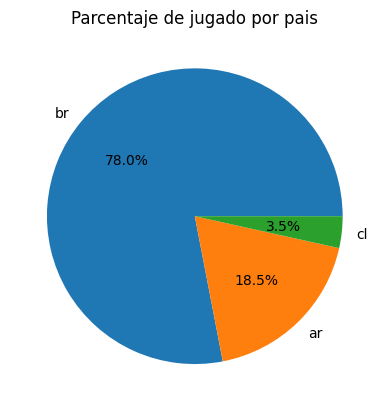

In [ ]:
plt.pie(tabla_de_frecuencia_top_pais["frequencia"], labels=tabla_de_frecuencia_top_pais["pais"].unique(),autopct='%1.1f%%')
plt.title("Parcentaje de jugado por pais")
plt.show()

Graficando un histograma de barras para una mejor interpretación visual.

In [ ]:
fig = px.bar(x = tabla_de_frecuencia_top_pais['pais'], y = tabla_de_frecuencia_top_pais['porcentaje'],
             labels={'x':'País', 'y':'%'},
             color_discrete_sequence=px.colors.qualitative.Prism,
             template='seaborn',
             text=tabla_de_frecuencia_top_pais['porcentaje']
             )
fig.update_layout(title={
                'text' : 'TOP 3 Países con mas jugadores en GC',
                'y': 0.95,
                'x': 0.5
})
fig.update_traces(textposition='outside',texttemplate='%{text:.2f}%')
fig.update_yaxes(showticklabels=False)
fig.show()

La mayoría de los jugadores son brasileños (76,25%), seguidos por argentinos (18,08%) y luego chilenos (3,39%).

Creando una nueva columna ('edad'), restando el año de nacimiento al año actual (2023).

Bien podríamos poner el año a mano pero lo vamos a hacer un poco mas dinámico y vamos a generar una función que me permita obtener la fecha actual.

In [ ]:
import datetime

def obtener_fecha_actual():
    fecha_actual = datetime.date.today()
    return fecha_actual

# Ejemplo de uso
fecha_actual = obtener_fecha_actual()


In [ ]:
players['dtBirth'] = pd.to_datetime(players['dtBirth'])
players['edad'] = fecha_actual.year - players['dtBirth'].dt.year
players['edad'].unique()

array([nan, 21., 23., 18., 29., 19., 20., 26., 25., 22., 27., 28., 31.,
       33., 38., 24., 34., 16., 17., 32., 30., 46., 50., 39., 36., 15.,
       62., 43., 35., 48., 37., 41., 44., 42., 79., 49., 40., 57., 51.,
       68.])

### Máximo y mínimo de edad

Verificamos cuales son los extremos en cuanto las edades.

In [ ]:
print(f'Menor edad: {players["edad"].min()}')
print(f'Mayor edad: {players["edad"].max()}')

Menor edad: 15.0
Mayor edad: 79.0


Ahora vemos la media, mediana y moda de las edades.

### Datos estadisticos sobre las edades

In [ ]:
print(f'''edad media: {players['edad'].mean()}
Mediana de edad: {players['edad'].median()}
Moda de edad: {players['edad'].mode()[0]}''')

edad media: 25.26593625498008
Mediana de edad: 24.0
Moda de edad: 23.0


 Creamos un gráfico que represente la distribución de datos

### Distribución de edades

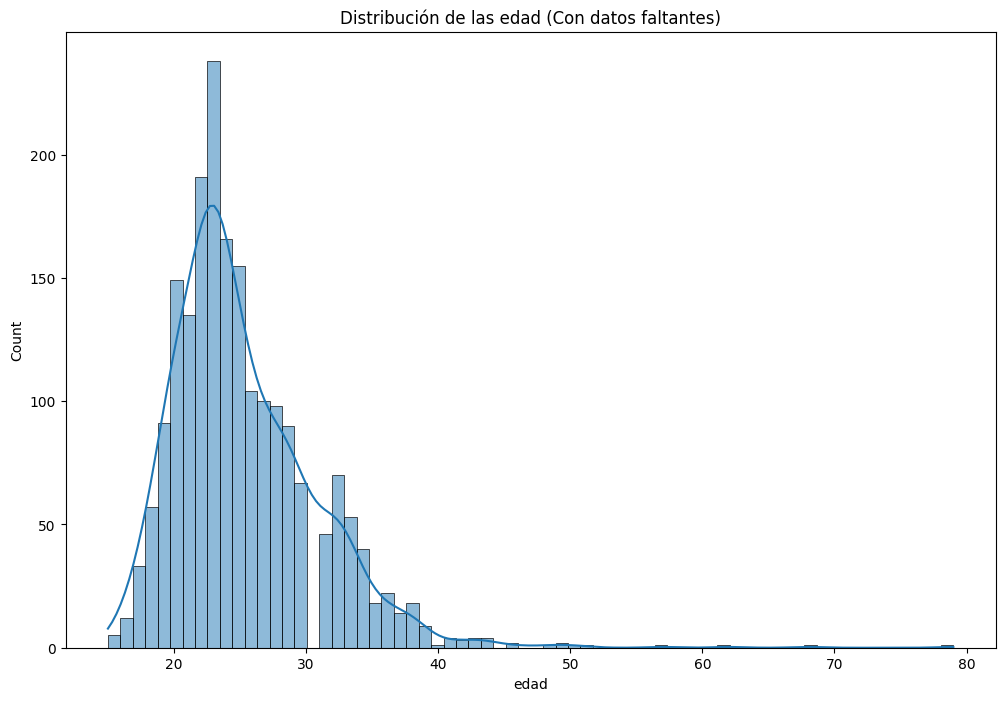

In [ ]:
fig = sns.histplot(players, x='edad', kde=True)
fig.figure.set_size_inches(12, 8)
fig.set_title('Distribución de las edad (Con datos faltantes)');

verficamos cuantos datos faltantes hay en la columna edad

In [ ]:
players['edad'].isnull().sum()

708

Sustituimos los datos faltantes en la columna edad por la mediana

In [ ]:
mediana_edad = players['edad'].median()
players['edad'].fillna(mediana_edad, inplace=True)

Chequemos que fueron sustituidos

In [ ]:
players['edad'].isnull().sum()

0

### Nueva clasificación

<h3>Creamos una clasificación para esas edades

In [ ]:
conditionlist = [
(players['edad'] >= 12) & (players['edad'] < 18),
(players['edad'] >= 18) & (players['edad'] < 30),
(players['edad'] >= 30) & (players['edad'] < 60),
(players['edad'] >= 60)]
choicelist = ['Adolescente', 'Joven', 'Adulto', 'Anciano']
players['clasificación'] = np.select(conditionlist, choicelist, default='Not Specified')

In [ ]:
freq_class = players['clasificación'].value_counts()
porcent_class = players['clasificación'].value_counts(normalize=True) * 100
tab_freq_class = pd.DataFrame({'frecuencia':freq_class, 'porcentaje':porcent_class}).reset_index()
tab_freq_class.rename(columns={'index':'clasificación'}, inplace = True)
tab_freq_class

,clasificación,frecuencia,porcentaje
0,Joven,2282,84.020619
1,Adulto,381,14.027982
2,Adolescente,50,1.840943
3,Anciano,3,0.110457


Generamos un nuevo gráfico para poder visualizar la información.

### Distribución de nuestra clasificación

In [ ]:
fig = px.bar(x = tab_freq_class['clasificación'], y = tab_freq_class['porcentaje'],
             labels={'x':'clasificación', 'y':'Frecuencia'},
             color_discrete_sequence=px.colors.qualitative.T10,
             template='seaborn',
             text=tab_freq_class['porcentaje']
             )
fig.update_layout(title={
                'text' : 'Porcentaje de jugadores por clasificación',
                'y': 0.95,
                'x': 0.5
})
fig.update_traces(textposition='outside',texttemplate='%{text:.2f}%')
fig.update_yaxes(showticklabels=False)
fig.show()

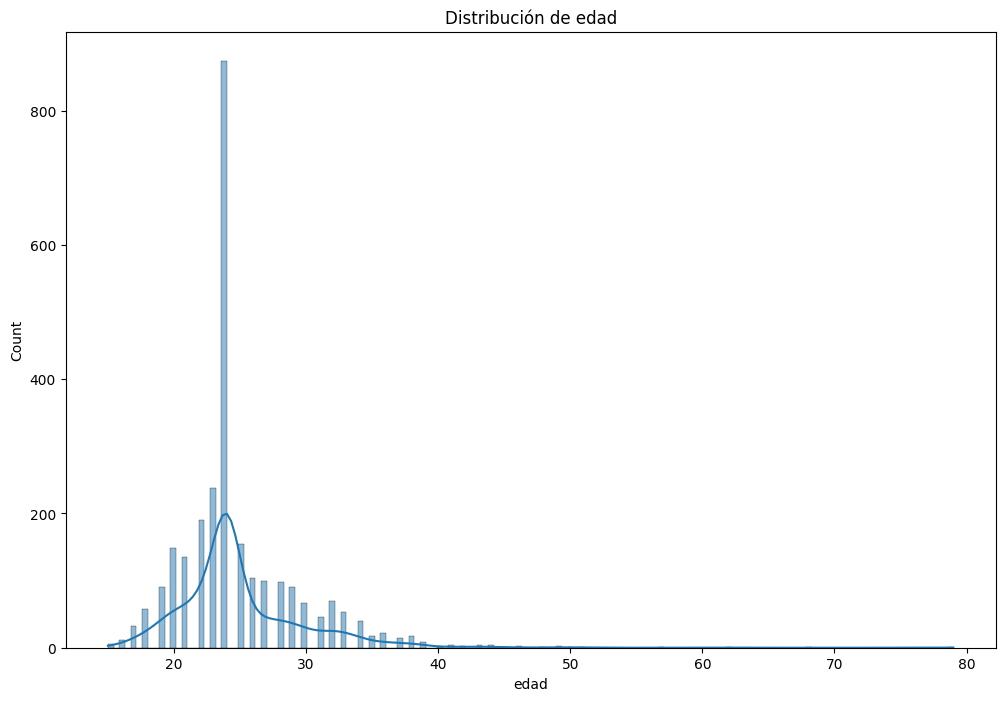

In [ ]:
fig = sns.histplot(players, x='edad', kde=True)
fig.figure.set_size_inches(12, 8)
fig.set_title('Distribución de edad');

Con los datos tratados (los datos faltantes en la columna de edad completados con la mediana), realizamos nuevamente la verificación de la media, moda y mediana

In [ ]:
print(f'''edad média: {players['edad'].mean()}
Mediana de edad: {players['edad'].median()}
Moda de edad: {players['edad'].mode()[0]}''')

edad média: 24.935935198821795
Mediana de edad: 24.0
Moda de edad: 24.0


<h4>Otra forma de ver la distribución

In [ ]:
fig = px.box(data_frame=players,
             x='edad',
             template='seaborn'
             )
fig.update_layout(title={
                'text' : 'Boxplot - Distribución de edad',
                'y': 0.95,
                'x': 0.5})
fig.show()

## Análisis de estadisticas de partidas

### Segunda Pregunta
### ¿ Qué cantidad de jugadores hay por nivel ?

Guardamos los datos dentro de un dataframe

In [ ]:
url = "/content/tb_lobby_stats_player.csv"
csgo = pd.read_csv(url)
csgo

,idLobbyGame,idPlayer,idRoom,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,...,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,flWinner,dtCreatedAt
0,1,1,1,5,1,16,2,0,0,0.0,...,0.0,3.0,13.0,4.0,2.0,2.0,1.0,0.0,0,2022-01-21 19:45:44
1,2,1,2,24,3,18,6,0,4,0.0,...,0.0,7.0,26.0,14.0,2.0,1.0,1.0,3.0,1,2022-02-04 02:09:47
2,3,2,3,6,4,23,2,0,1,0.0,...,0.0,3.0,15.0,8.0,1.0,2.0,0.0,2.0,0,2021-09-18 18:07:43
3,3,391,27508,10,5,20,4,1,0,0.0,...,0.0,6.0,27.0,10.0,1.0,7.0,6.0,6.0,1,2021-09-18 18:07:43
4,4,2,4,8,4,26,6,0,2,0.0,...,2.0,8.0,19.0,12.0,2.0,3.0,2.0,5.0,0,2021-09-27 00:17:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184147,172907,2716,178496,21,3,13,5,1,1,0.0,...,0.0,7.0,42.0,26.0,1.0,4.0,6.0,2.0,1,2021-11-27 16:47:57
184148,172908,2716,178497,15,1,22,5,0,1,0.0,...,0.0,5.0,21.0,21.0,3.0,7.0,2.0,4.0,1,2021-12-10 01:08:48
184149,172909,2716,178498,9,6,23,2,0,3,0.0,...,0.0,3.0,25.0,12.0,1.0,5.0,6.0,7.0,0,2022-01-09 21:01:10
184150,172910,2716,178499,15,5,20,6,0,2,0.0,...,1.0,8.0,22.0,16.0,2.0,8.0,3.0,6.0,0,2022-01-14 17:42:37


Vamos a buscar la cantidad de jugadores que hay por nivel

In [ ]:
player_lvl= csgo['vlLevel'].value_counts()
tabla_lvl = pd.DataFrame({'players': player_lvl}).reset_index()
tabla_lvl.sort_values(by=["index"],inplace=True,ascending=False)
tabla_lvl.rename(columns={'index':'level'}, inplace=True)
tabla_lvl

,level,players
18,21,1354
0,20,18301
1,19,15648
3,18,13703
7,17,12100
5,16,12447
2,15,14202
8,14,12081
6,13,12426
10,12,11342


### Cantidad de jugadores por nivel

In [ ]:
fig = px.bar(tabla_lvl, x="level", y="players", color="level", hover_data=['players'])
fig.update_layout(title="Distribución por level", xaxis_title="Level",yaxis_title="Jugadores")

fig.show()

In [ ]:
stats_player = pd.merge(csgo, players[['idPlayer', 'descCountry']], on='idPlayer', how='left', suffixes=('_izq', '_der'))
stats_player

,idLobbyGame,idPlayer,idRoom,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,...,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,flWinner,dtCreatedAt,descCountry
0,1,1,1,5,1,16,2,0,0,0.0,...,3.0,13.0,4.0,2.0,2.0,1.0,0.0,0,2022-01-21 19:45:44,cl
1,2,1,2,24,3,18,6,0,4,0.0,...,7.0,26.0,14.0,2.0,1.0,1.0,3.0,1,2022-02-04 02:09:47,cl
2,3,2,3,6,4,23,2,0,1,0.0,...,3.0,15.0,8.0,1.0,2.0,0.0,2.0,0,2021-09-18 18:07:43,br
3,3,391,27508,10,5,20,4,1,0,0.0,...,6.0,27.0,10.0,1.0,7.0,6.0,6.0,1,2021-09-18 18:07:43,br
4,4,2,4,8,4,26,6,0,2,0.0,...,8.0,19.0,12.0,2.0,3.0,2.0,5.0,0,2021-09-27 00:17:45,br
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184147,172907,2716,178496,21,3,13,5,1,1,0.0,...,7.0,42.0,26.0,1.0,4.0,6.0,2.0,1,2021-11-27 16:47:57,br
184148,172908,2716,178497,15,1,22,5,0,1,0.0,...,5.0,21.0,21.0,3.0,7.0,2.0,4.0,1,2021-12-10 01:08:48,br
184149,172909,2716,178498,9,6,23,2,0,3,0.0,...,3.0,25.0,12.0,1.0,5.0,6.0,7.0,0,2022-01-09 21:01:10,br
184150,172910,2716,178499,15,5,20,6,0,2,0.0,...,8.0,22.0,16.0,2.0,8.0,3.0,6.0,0,2022-01-14 17:42:37,br


In [ ]:
table_player = stats_player.groupby(['idPlayer', 'descCountry']).agg({'qtKill': 'sum', 'qtDeath': 'sum', 'idRoom': 'count','qtRoundsPlayed':'sum', 'flWinner': 'sum'})
table_player

,,qtKill,qtDeath,idRoom,qtRoundsPlayed,flWinner
idPlayer,descCountry,,,,,
1,cl,29,34,2,44,1
2,br,204,423,21,505,8
3,br,1900,1728,89,2461,45
4,br,29,44,3,61,1
5,ar,72,63,4,91,1
...,...,...,...,...,...,...
2712,br,3324,3289,177,4676,89
2713,br,13,20,1,21,0
2714,br,554,594,29,819,11


In [ ]:
table_player['k/d'] = table_player['qtKill'] / table_player['qtDeath']
table_player['RatingWin'] = table_player['flWinner']/ table_player['idRoom']

In [ ]:
table_player.sort_values(by ='RatingWin', ascending = False)

,,qtKill,qtDeath,idRoom,qtRoundsPlayed,flWinner,k/d,RatingWin
idPlayer,descCountry,,,,,,,
310,br,68,40,3,72,3,1.700000,1.0
1113,br,18,15,1,21,1,1.200000,1.0
1087,ar,36,16,1,22,1,2.250000,1.0
2242,br,33,32,2,46,2,1.031250,1.0
2382,br,16,20,1,24,1,0.800000,1.0
...,...,...,...,...,...,...,...,...
2468,uy,49,57,3,66,0,0.859649,0.0
1048,br,10,17,1,19,0,0.588235,0.0
2470,br,97,102,6,126,0,0.950980,0.0


In [ ]:
Top_player = table_player[table_player['k/d'] > 1 ]
Top_player.sort_values(by='k/d', ascending=False)

,,qtKill,qtDeath,idRoom,qtRoundsPlayed,flWinner,k/d,RatingWin
idPlayer,descCountry,,,,,,,
79,br,36,12,1,26,1,3.000000,1.000000
863,br,99,35,2,64,1,2.828571,0.500000
1541,ar,16,6,1,12,1,2.666667,1.000000
2669,br,27,11,1,24,1,2.454545,1.000000
2030,pe,96,41,3,71,3,2.341463,1.000000
...,...,...,...,...,...,...,...,...
2599,br,2196,2193,158,3050,82,1.001368,0.518987
231,br,1496,1494,79,2128,45,1.001339,0.569620
1852,br,2035,2033,108,2896,49,1.000984,0.453704


In [ ]:
Top_player.reset_index(level='descCountry', inplace=True)

### Mejores jugadores de Argentina

In [ ]:
Top_player_arg = Top_player[ Top_player['descCountry'] == 'ar' ]
Top_player_arg = Top_player_arg[Top_player_arg['idRoom'] > 1]
Top_player_arg.sort_values(by='k/d', ascending=False)

,descCountry,qtKill,qtDeath,idRoom,qtRoundsPlayed,flWinner,k/d,RatingWin
idPlayer,,,,,,,,
1846,ar,149,68,5,129,4,2.191176,0.800000
2198,ar,73,35,3,70,3,2.085714,1.000000
2475,ar,90,50,4,88,3,1.800000,0.750000
2693,ar,61,34,2,57,1,1.794118,0.500000
2635,ar,48,27,2,41,2,1.777778,1.000000
...,...,...,...,...,...,...,...,...
2063,ar,1228,1220,66,1674,34,1.006557,0.515152
534,ar,1216,1211,72,1745,29,1.004129,0.402778
1008,ar,1045,1042,53,1445,25,1.002879,0.471698


In [ ]:
frecuencia_mapa = csgo.value_counts('descMapName')
porcentaje_mapa = csgo.value_counts('descMapName', normalize=True) * 100
tab_freq_mapa = pd.DataFrame({'frecuencia':frecuencia_mapa, 'porcentaje':porcentaje_mapa}).reset_index()
tab_freq_mapa.rename(columns={'descMapName':'mapa'}, inplace=True)
tab_freq_mapa

,mapa,frecuencia,porcentaje
0,de_mirage,58101,31.550567
1,de_inferno,42073,22.846887
2,de_dust2,23834,12.942569
3,de_vertigo,19924,10.819323
4,de_overpass,14088,7.650202
5,de_nuke,14053,7.631196
6,de_train,7846,4.260611
7,de_ancient,4233,2.298645


### Mapas mas jugados

<Axes: xlabel='mapa', ylabel='porcentaje'>

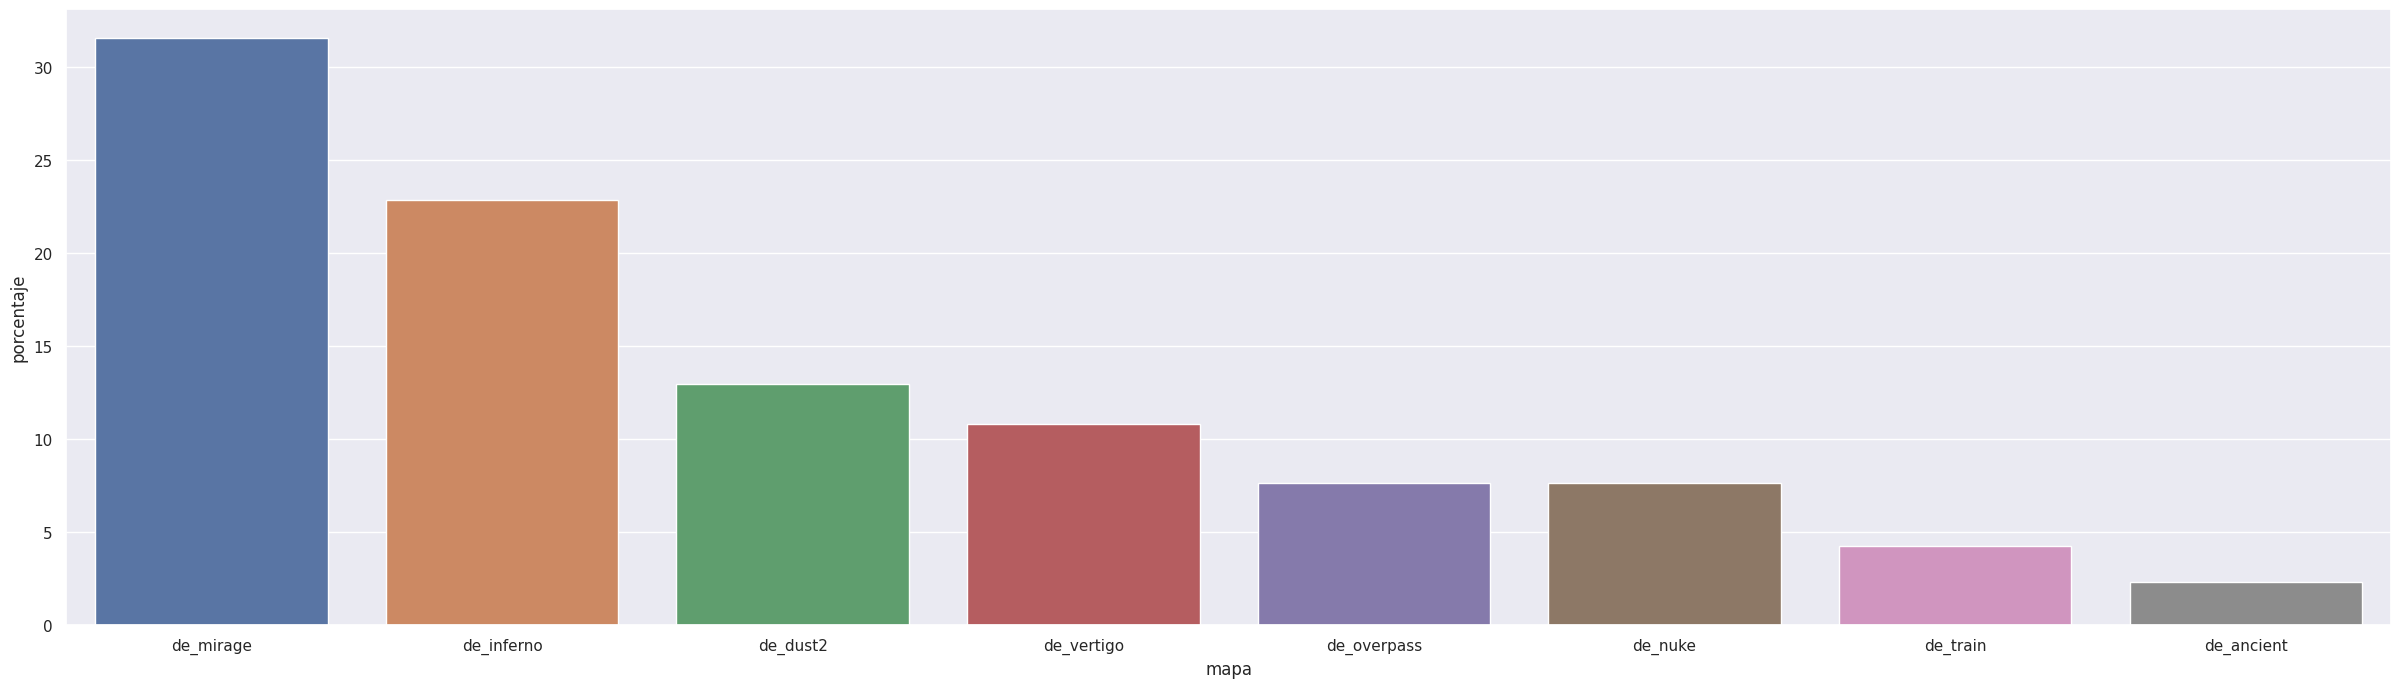

In [ ]:
sns.set(rc={'figure.figsize':(30,8)})
sns.barplot(x="mapa", y = "porcentaje", data = tab_freq_mapa)

In [ ]:
csgo['dtCreatedAt'] =  pd.to_datetime(csgo['dtCreatedAt'])
csgo['year'] = csgo['dtCreatedAt'].dt.year
group_year = csgo.groupby(by= ['year'], as_index=False)[['idLobbyGame']].count()
group_year

,year,idLobbyGame
0,2021,120818
1,2022,63334


### Partida por año

<Axes: title={'center': 'Partidas'}, xlabel='Mes', ylabel='Cantidad'>

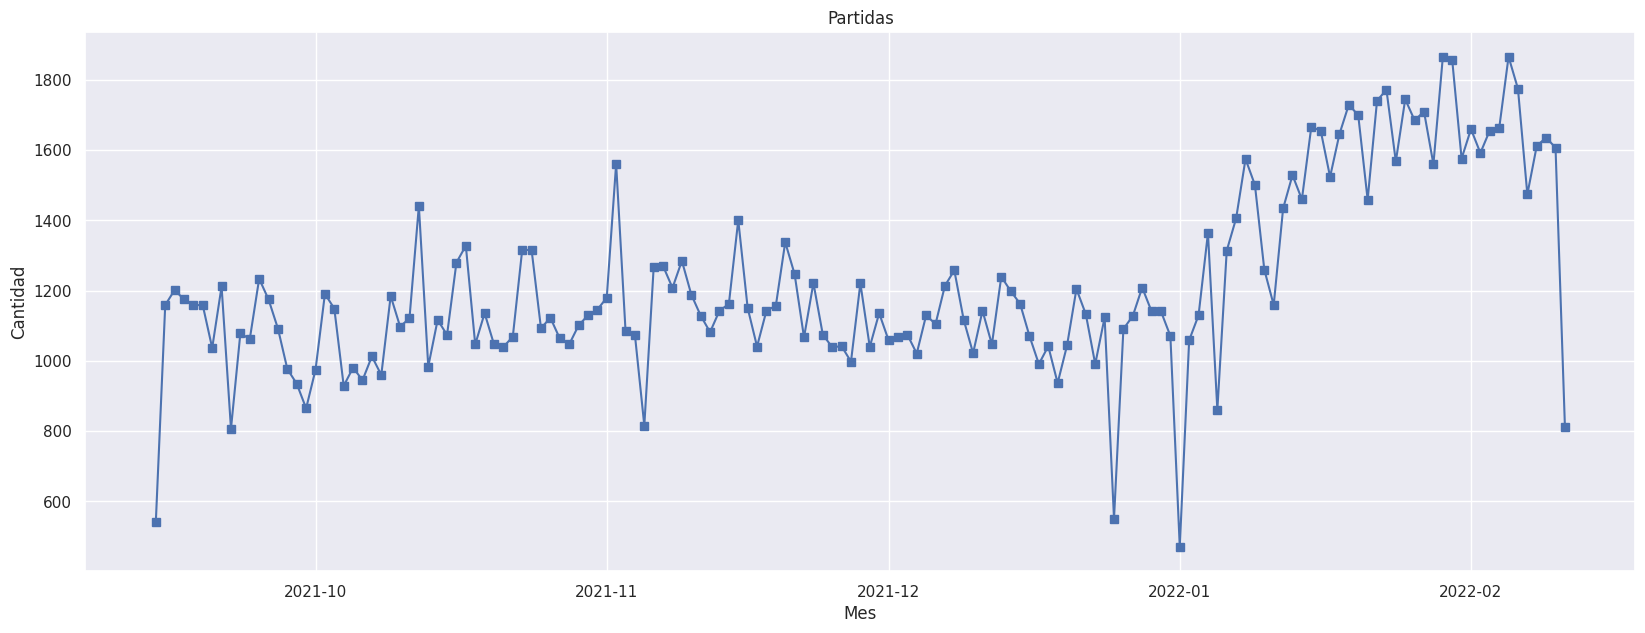

In [ ]:
csgo['Fecha'] = pd.to_datetime(csgo['dtCreatedAt']).dt.date
df_agrupado = csgo.groupby('Fecha').count()
df_agrupado['idRoom'].plot(figsize=(20,7),title='Partidas',xlabel='Mes',ylabel='Cantidad',style=['s-','o-','^-','--',':'],grid=True)

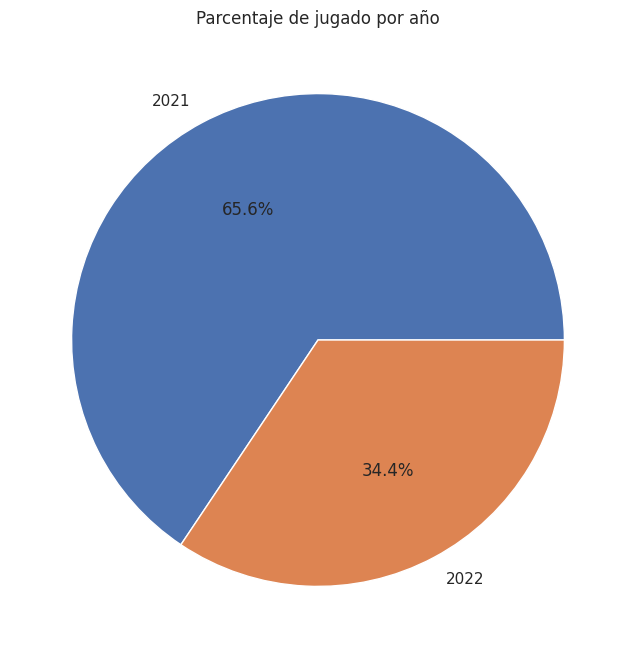

In [ ]:
plt.pie(group_year["idLobbyGame"], labels=group_year["year"].unique(),autopct='%1.1f%%')
plt.title("Parcentaje de jugado por año")
plt.show()

In [ ]:
group_tk = csgo.groupby(by='vlLevel', as_index=False)[['qtTk']].mean()
group_tk['qtTk'] = group_tk['qtTk'] * 100
group_tk.head()

,vlLevel,qtTk
0,0,2.175970
1,1,2.991453
2,2,3.181818
3,3,4.045237
4,4,3.382148


### Distribución de kills por nivel

In [ ]:
fig = px.bar(x = group_tk['vlLevel'], y = group_tk['qtTk'],
             labels={'x':'Level', 'y':'Promedio Kills'},
             color_discrete_sequence=px.colors.qualitative.T10,
             template='seaborn'
             )
fig.update_layout(title={
                'text' : 'Promedio de Kills por level',
                'y': 0.95,
                'x': 0.5
})

fig.show()

## INSIGHTS

- Los mejores meses para jugar, son enero y febrero porque es cuando hay más gente.
- El mapa que seguramente juegues son “Mirage” e “Inferno”
- Seguramente con la gente que juegues sean de brasil porque son la mayoría de jugadores
- También que la gente con la que juegues sean jóvenes o adultos
- La partida que juegues va a tener un nivel arriba de la mitad, ya que con el gráfico de distribución los niveles de sala son entre 15 y 20
